In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\jiangchun.li.ext.AXA-DIL\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


# test regressor

In [2]:
test_ross = joblib.load('test_ross.pkl')

ross_data = test_ross['data']
ross_features = test_ross['features']
ross_target = test_ross['target']
ross_model = test_ross['rf_model']

# test target_plot

#### (model: regression, feature_type: binary)

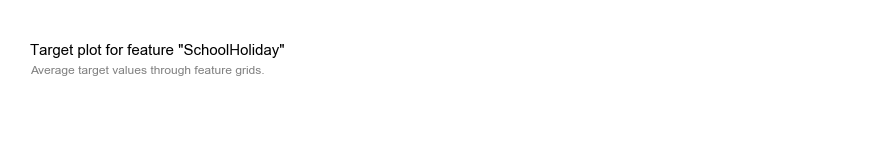

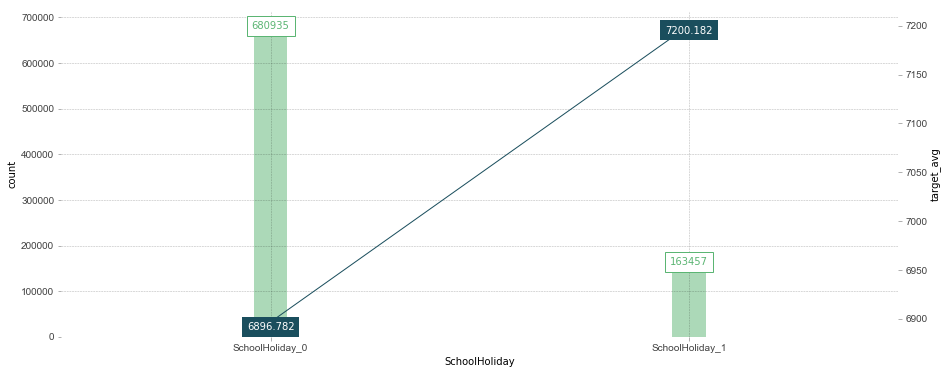

In [4]:
axes, df = target_plot(df=ross_data, feature='SchoolHoliday', feature_name='SchoolHoliday', target='Sales', figsize=(15, 6))

In [5]:
df

,x,display_column,count,Sales
0,0,SchoolHoliday_0,680935,6896.782411
1,1,SchoolHoliday_1,163457,7200.181650


#### (model: regression, feature_type: one-hot)

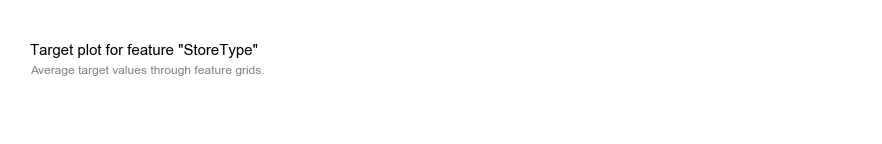

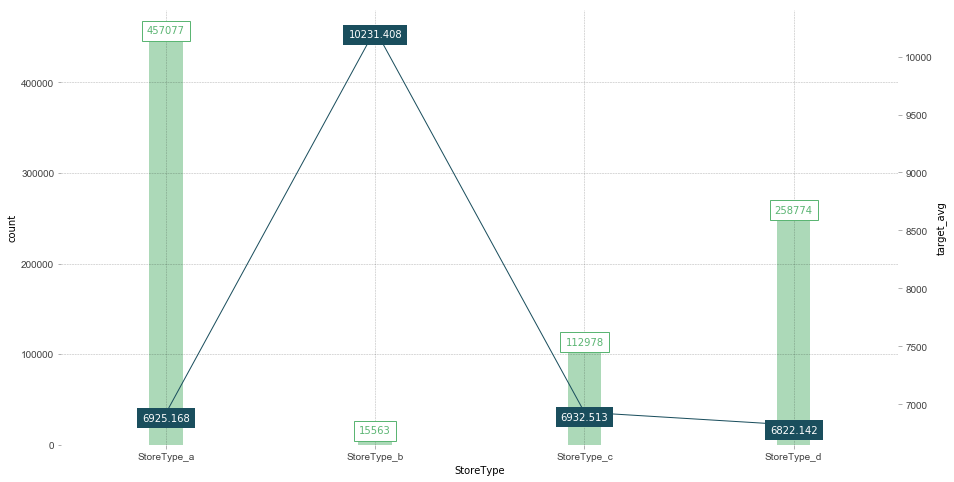

In [6]:
axes, df = target_plot(df=ross_data, feature=['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'],
                       feature_name='StoreType', target='Sales', figsize=(15, 8))

In [7]:
df

,x,display_column,count,Sales
0,0,StoreType_a,457077,6925.167661
1,1,StoreType_b,15563,10231.407505
2,2,StoreType_c,112978,6932.512755
3,3,StoreType_d,258774,6822.141881


In [8]:
for col in ['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d']:
    print(col, ross_data[col].sum(), ross_data[ross_data[col]==1]['Sales'].mean())

('StoreType_a', 457077, 6925.167661028667)
('StoreType_b', 15563, 10231.40750497976)
('StoreType_c', 112978, 6932.512754695605)
('StoreType_d', 258774, 6822.1418805598705)


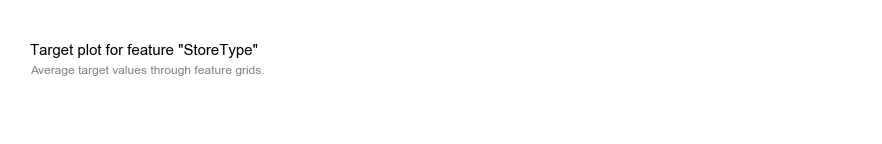

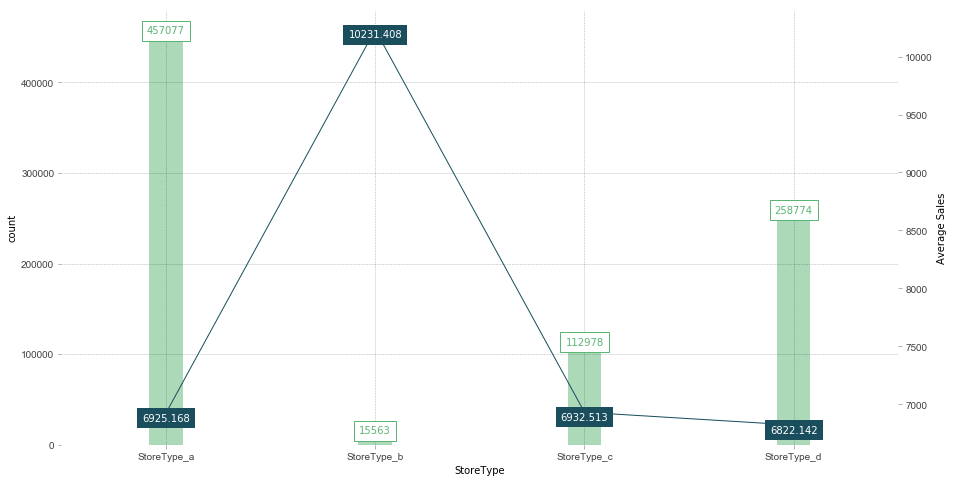

In [9]:
# modify returned axes
axes, df = target_plot(df=ross_data, feature=['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'],
                       feature_name='StoreType', target='Sales', figsize=(15, 8))
_ = axes[2].set_ylabel('Average Sales')

#### (model: multi-class, feature_type: numeric)

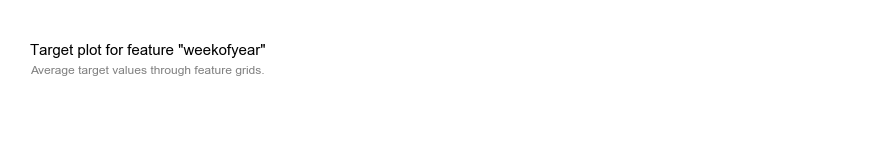

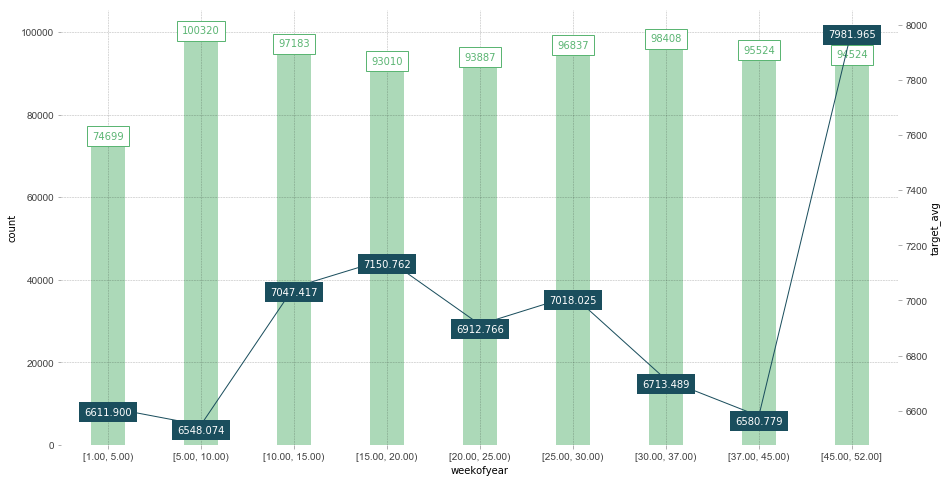

In [10]:
axes, df = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', figsize=(15, 8))

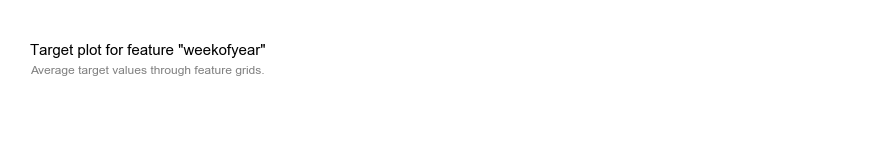

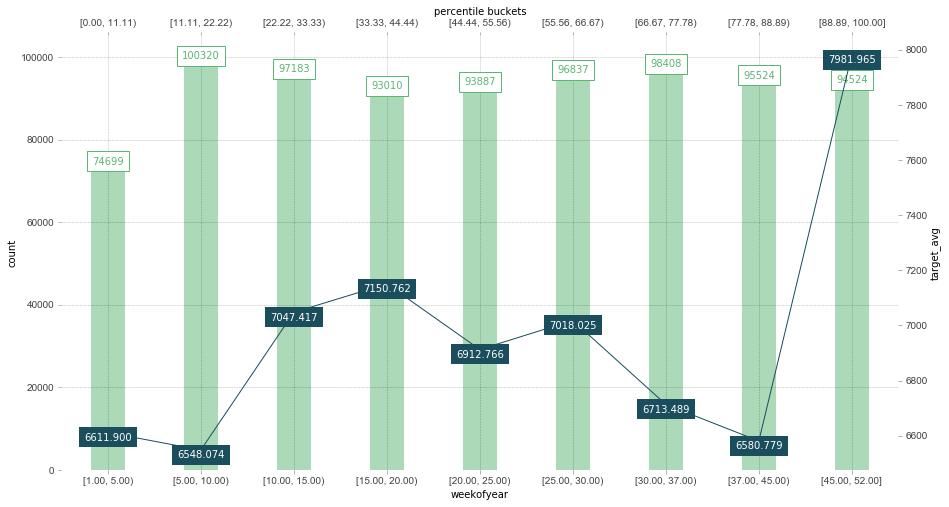

In [11]:
# show percentile
axes, df = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', 
                       target='Sales', figsize=(15, 8), show_percentile=True)

In [12]:
df

,x,display_column,percentile_column,count,Sales
0,0,"[1.00, 5.00)","[0.00, 11.11)",74699,6611.900307
1,1,"[5.00, 10.00)","[11.11, 22.22)",100320,6548.074412
2,2,"[10.00, 15.00)","[22.22, 33.33)",97183,7047.416801
3,3,"[15.00, 20.00)","[33.33, 44.44)",93010,7150.762251
4,4,"[20.00, 25.00)","[44.44, 55.56)",93887,6912.765740
5,5,"[25.00, 30.00)","[55.56, 66.67)",96837,7018.025414
6,6,"[30.00, 37.00)","[66.67, 77.78)",98408,6713.488893
7,7,"[37.00, 45.00)","[77.78, 88.89)",95524,6580.778694
8,8,"[45.00, 52.00]","[88.89, 100.00]",94524,7981.965109


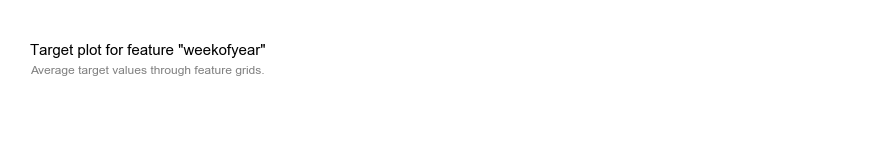

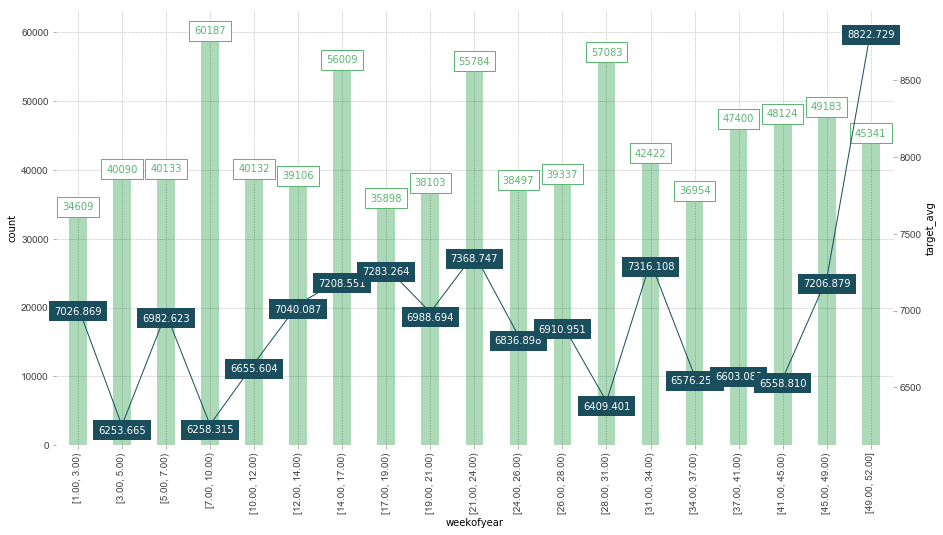

In [13]:
# more grids, use xticks_rotation
axes, df = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', 
                       target='Sales', num_grid_points=20, plot_params={'xticks_rotation': 90}, figsize=(15, 8))

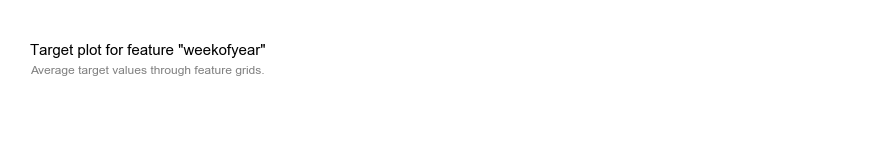

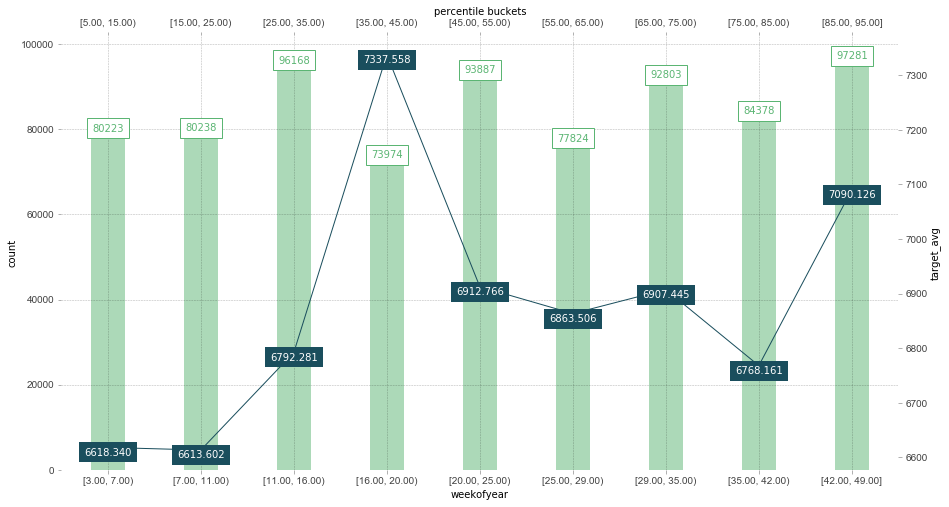

In [14]:
# percentile_range
axes, df = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                       num_grid_points=10, grid_type='percentile', percentile_range=(5, 95), figsize=(15, 8), 
                       show_percentile=True)

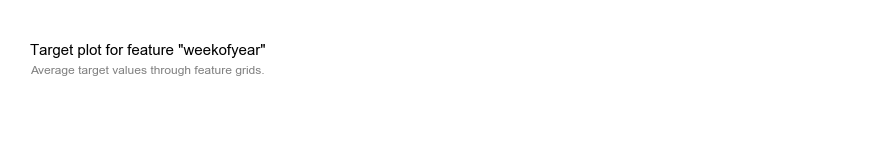

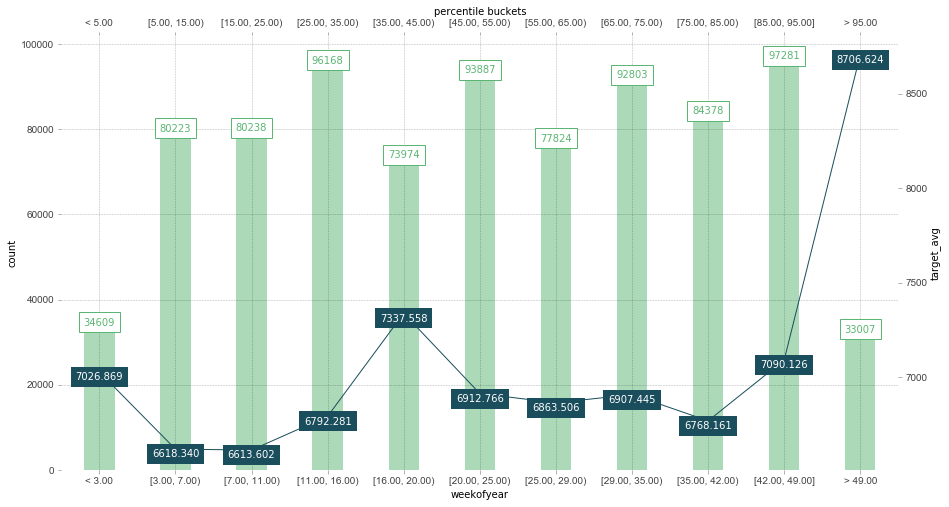

In [15]:
# percentile_range and show_outliers
axes, df = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                       num_grid_points=10, grid_type='percentile', percentile_range=(5, 95), figsize=(15, 8), 
                       show_percentile=True, show_outliers=True)

In [16]:
df

,x,display_column,percentile_column,count,Sales
0,0,< 3.00,< 5.00,34609,7026.869109
1,1,"[3.00, 7.00)","[5.00, 15.00)",80223,6618.339516
2,2,"[7.00, 11.00)","[15.00, 25.00)",80238,6613.601560
3,3,"[11.00, 16.00)","[25.00, 35.00)",96168,6792.280821
4,4,"[16.00, 20.00)","[35.00, 45.00)",73974,7337.557547
5,5,"[20.00, 25.00)","[45.00, 55.00)",93887,6912.765740
6,6,"[25.00, 29.00)","[55.00, 65.00)",77824,6863.506399
7,7,"[29.00, 35.00)","[65.00, 75.00)",92803,6907.444716
8,8,"[35.00, 42.00)","[75.00, 85.00)",84378,6768.160788
9,9,"[42.00, 49.00]","[85.00, 95.00]",97281,7090.126479


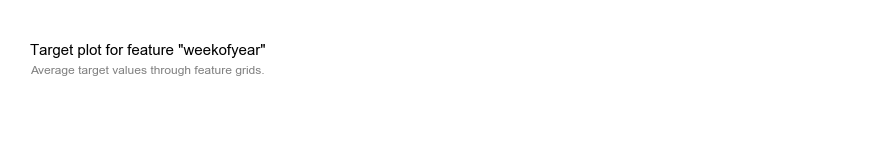

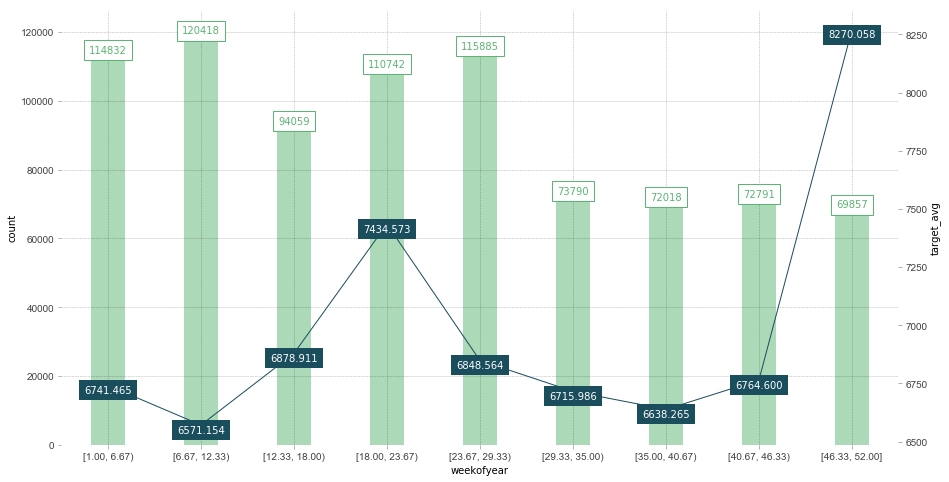

In [17]:
# equal grid_type
axes, df = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                       num_grid_points=10, grid_type='equal', figsize=(15, 8))

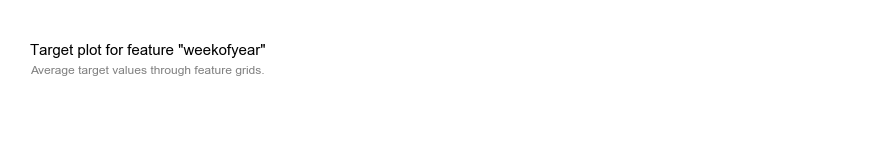

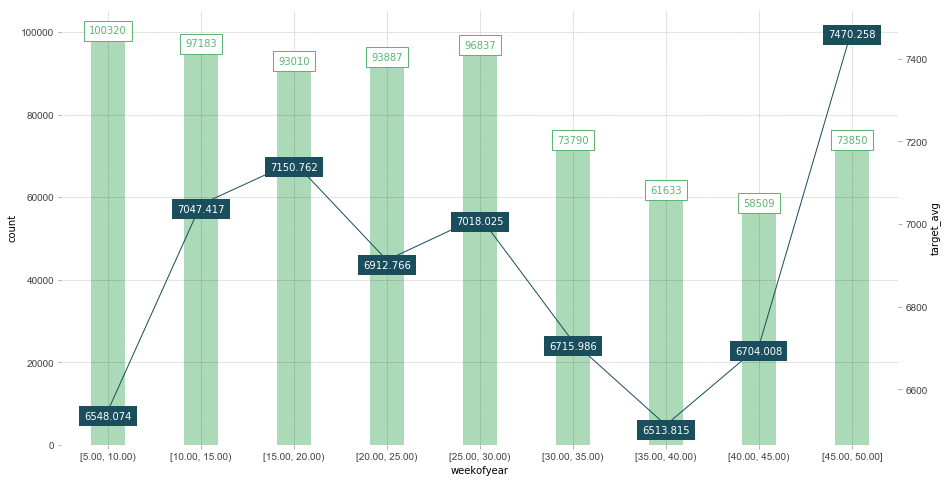

In [18]:
# grid_range
axes, df = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                       num_grid_points=10, grid_type='equal', grid_range=(5, 50), figsize=(15, 8))

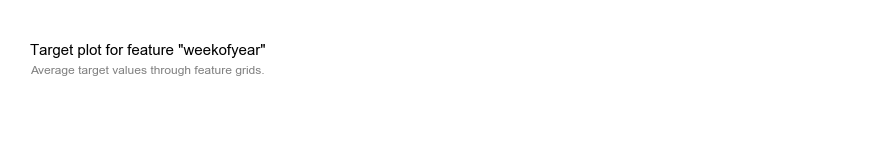

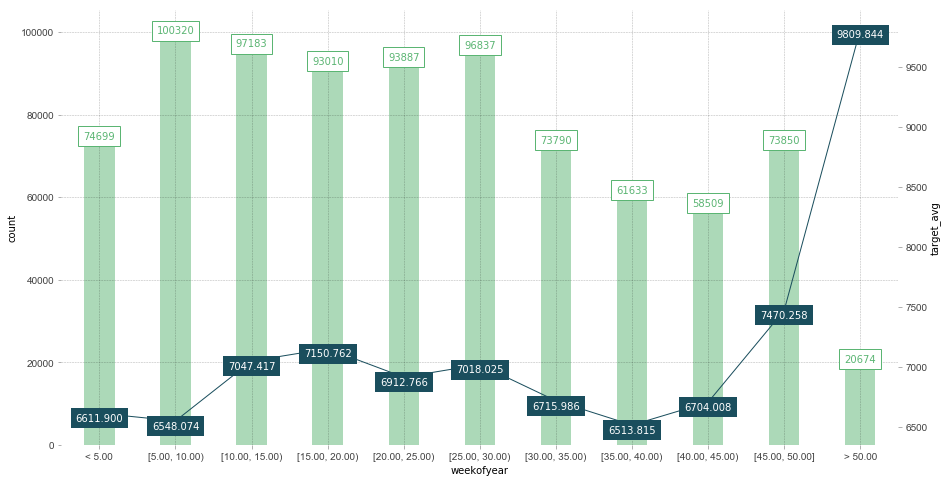

In [19]:
# grid_range and show_outliers
axes, df = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                       num_grid_points=10, grid_type='equal', grid_range=(5, 50), figsize=(15, 8), show_outliers=True)

In [20]:
df

,x,display_column,count,Sales
0,0,< 5.00,74699,6611.900307
1,1,"[5.00, 10.00)",100320,6548.074412
2,2,"[10.00, 15.00)",97183,7047.416801
3,3,"[15.00, 20.00)",93010,7150.762251
4,4,"[20.00, 25.00)",93887,6912.765740
5,5,"[25.00, 30.00)",96837,7018.025414
6,6,"[30.00, 35.00)",73790,6715.985730
7,7,"[35.00, 40.00)",61633,6513.814888
8,8,"[40.00, 45.00)",58509,6704.007571
9,9,"[45.00, 50.00]",73850,7470.257969


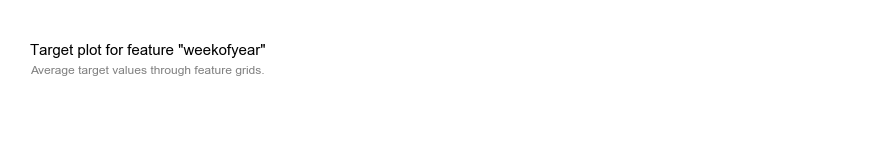

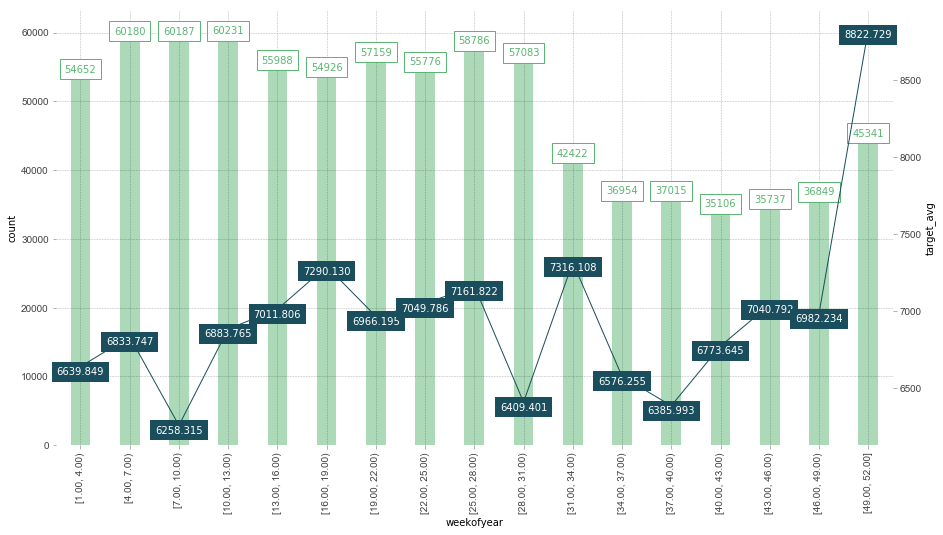

In [21]:
# customized grid points
axes, df = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                       cust_grid_points=range(1, 54, 3), plot_params={'xticks_rotation': 90}, figsize=(15, 8))

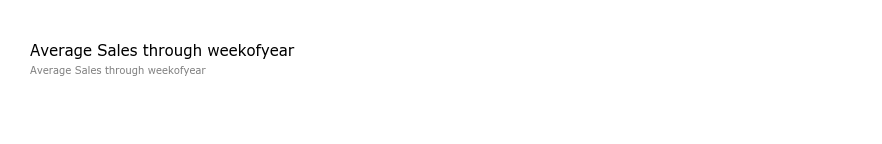

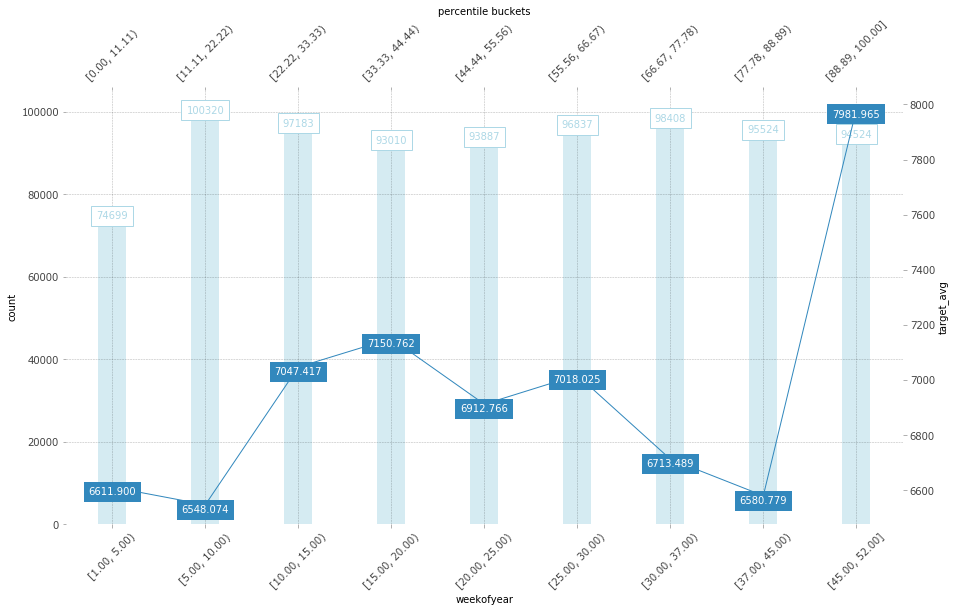

In [23]:
# use plot_params
plot_params = {
    'font_family': 'Verdana',
    'title': 'Average Sales through weekofyear',
    'subtitle': 'Average Sales through weekofyear',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'line_width': 1,
    'line_color': '#3288bd',
    'line_colors_cmap': 'Blues',
    'line_colors': plt.get_cmap('Blues')(range(20)),
    'bar_color': 'lightblue',
    'bar_width': 0.3,
    'xticks_rotation': 45
}
axes, df = target_plot(df=ross_data, feature='weekofyear', feature_name='weekofyear', target='Sales', 
                       plot_params=plot_params, figsize=(15, 8), show_percentile=True)

# test target plot interact

In [24]:
from pdpbox.info_plots import target_plot_interact

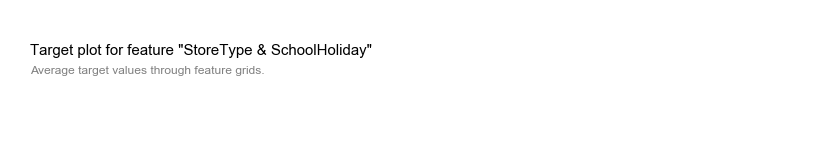

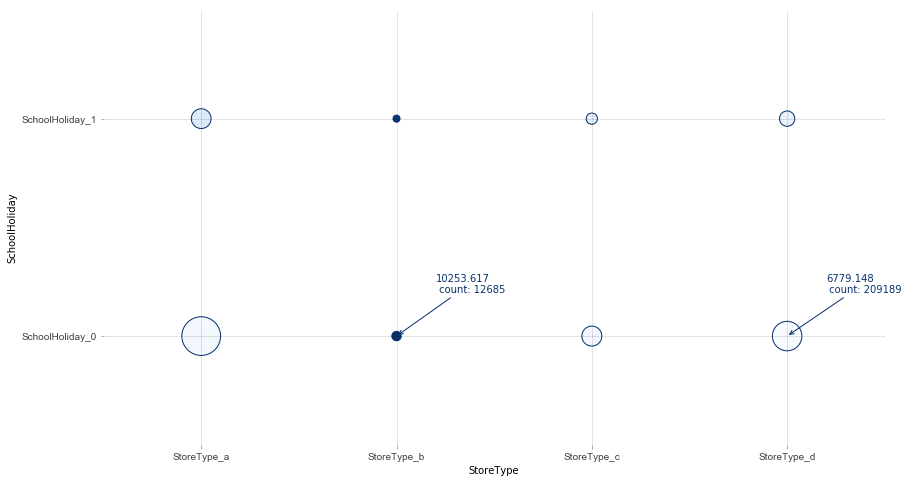

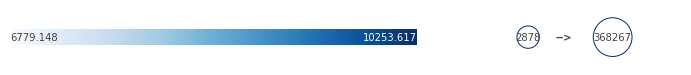

In [25]:
axes, df = target_plot_interact(df=ross_data, features=[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], 
                                                        'SchoolHoliday'], feature_names=['StoreType', 'SchoolHoliday'], 
                                target=ross_target, figsize=(14, 8))

In [26]:
df

,x1,x2,display_column_1,display_column_2,count,Sales
0,0,0,StoreType_a,SchoolHoliday_0,368267,6850.968137
1,0,1,StoreType_a,SchoolHoliday_1,88810,7232.849634
2,1,0,StoreType_b,SchoolHoliday_0,12685,10253.616634
3,1,1,StoreType_b,SchoolHoliday_1,2878,10133.519110
4,2,0,StoreType_c,SchoolHoliday_0,90794,6884.647499
5,2,1,StoreType_c,SchoolHoliday_1,22184,7128.414217
6,3,0,StoreType_d,SchoolHoliday_0,209189,6779.148215
7,3,1,StoreType_d,SchoolHoliday_1,49585,7003.523384


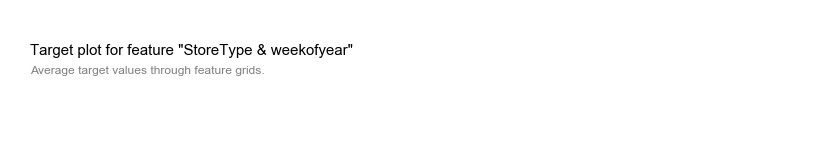

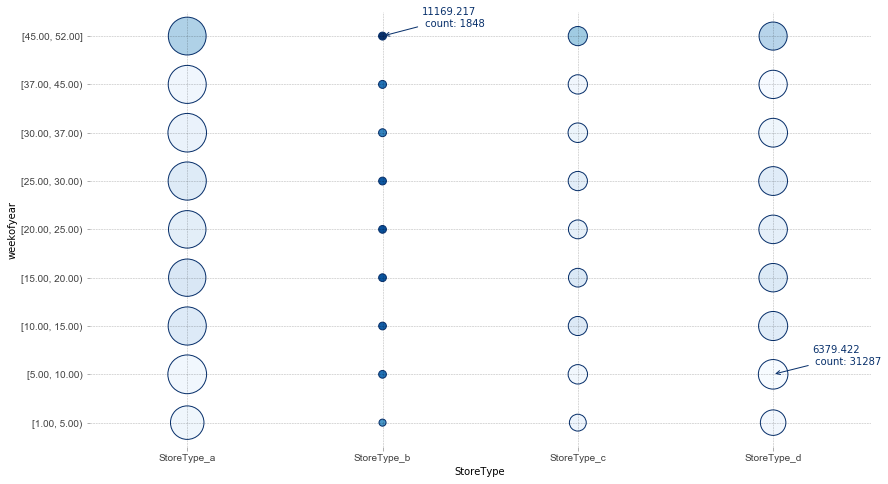

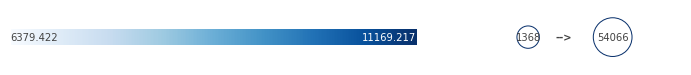

In [27]:
axes, df = target_plot_interact(df=ross_data, features=[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], 
                                                        'weekofyear'], feature_names=['StoreType', 'weekofyear'], 
                                target=ross_target, figsize=(14, 8))

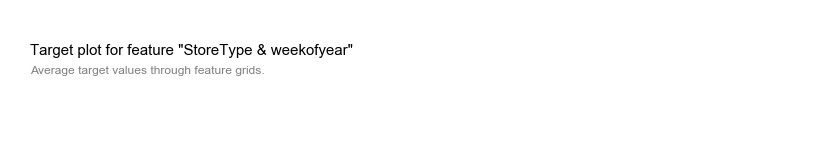

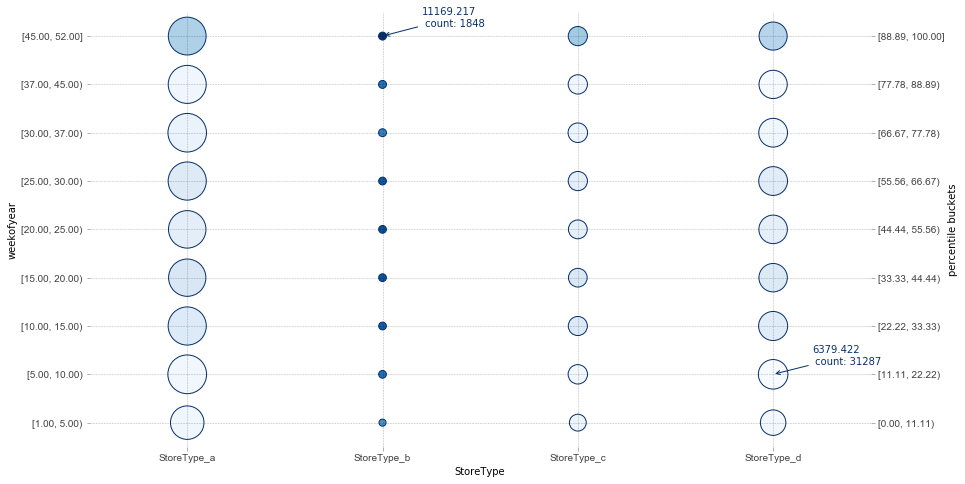

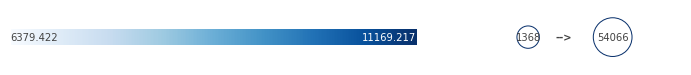

In [28]:
axes, df = target_plot_interact(df=ross_data, features=[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], 
                                                        'weekofyear'], feature_names=['StoreType', 'weekofyear'], 
                                target=ross_target, figsize=(14, 8), show_percentile=True)

In [31]:
print ross_data[(ross_data.StoreType_b==1) & (ross_data.weekofyear >= 45) & (ross_data.weekofyear <= 52)].shape
print ross_data[(ross_data.StoreType_b==1) & (ross_data.weekofyear >= 45) & (ross_data.weekofyear <= 52)]['Sales'].mean()

(1848, 29)
11169.2169913


In [32]:
print ross_data[(ross_data.StoreType_d==1) & (ross_data.weekofyear >= 5) & (ross_data.weekofyear < 10)].shape
print ross_data[(ross_data.StoreType_d==1) & (ross_data.weekofyear >= 5) & (ross_data.weekofyear < 10)]['Sales'].mean()

(31287, 29)
6379.42209224


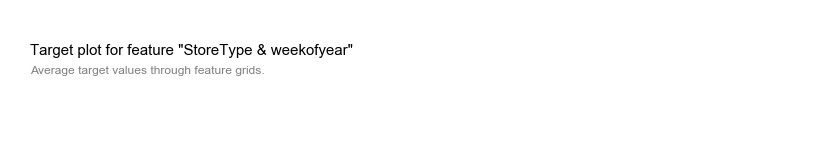

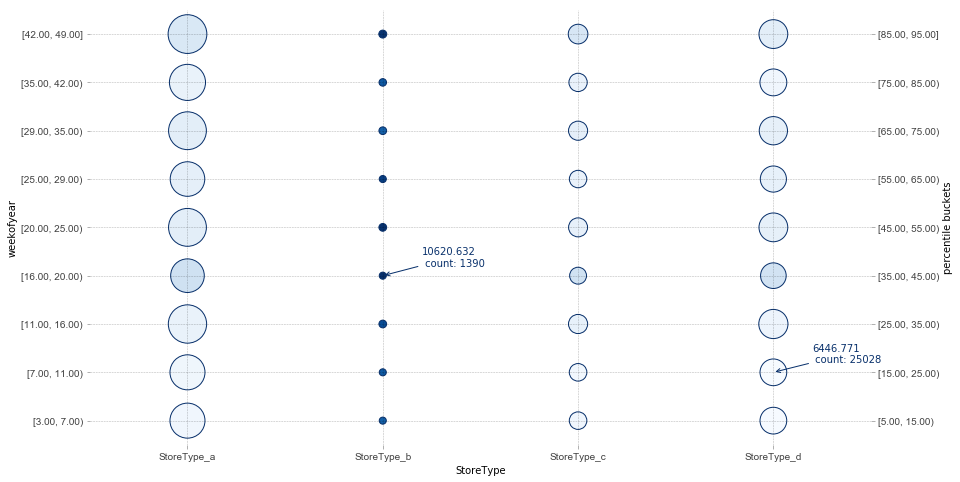

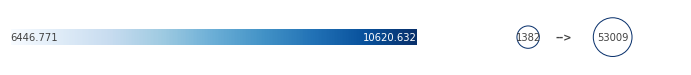

In [34]:
axes, df = target_plot_interact(df=ross_data, features=[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], 
                                                        'weekofyear'], feature_names=['StoreType', 'weekofyear'], 
                                target=ross_target, figsize=(14, 8), show_percentile=True, percentile_ranges=[None, (5, 95)])

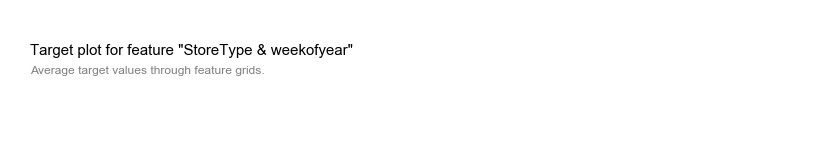

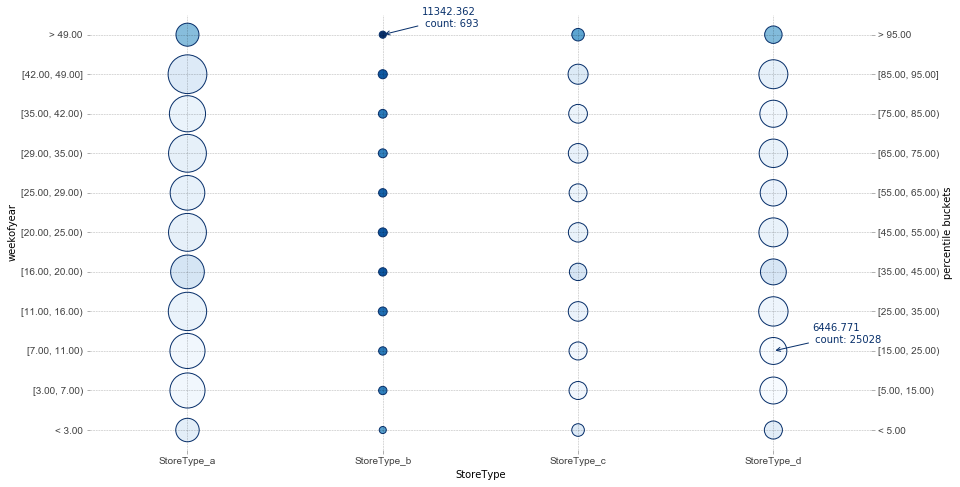

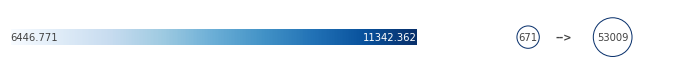

In [35]:
axes, df = target_plot_interact(df=ross_data, features=[['StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d'], 
                                                        'weekofyear'], feature_names=['StoreType', 'weekofyear'], 
                                target=ross_target, figsize=(14, 8), show_percentile=True, 
                                percentile_ranges=[None, (5, 95)], show_outliers=True)

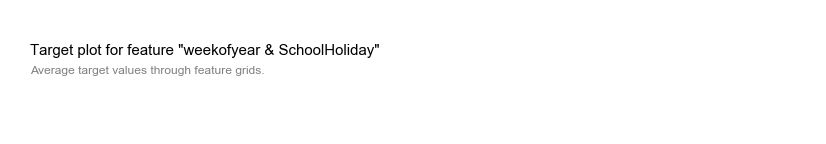

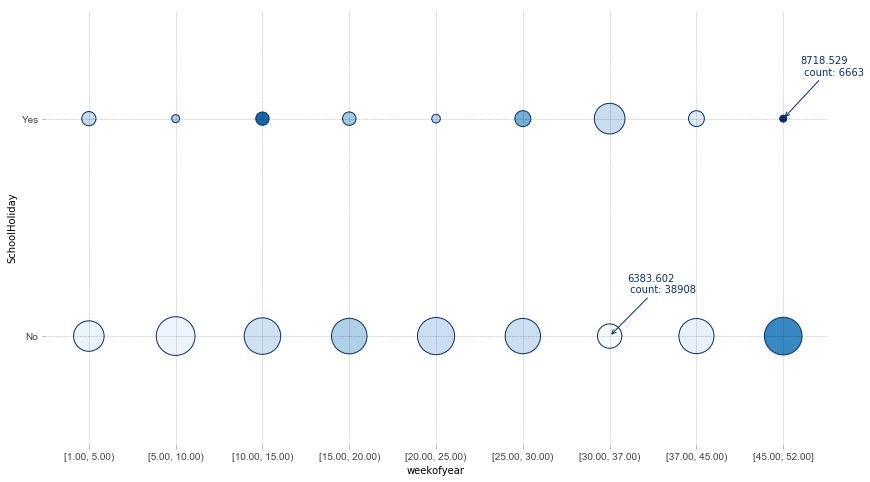

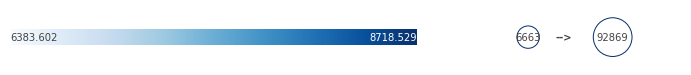

In [33]:
axes, df = target_plot_interact(df=ross_data, features=['weekofyear', 'SchoolHoliday'], 
                                feature_names=['weekofyear', 'SchoolHoliday'], target=ross_target, figsize=(14, 8))
_ = axes[1].set_yticklabels(['No', 'Yes'])

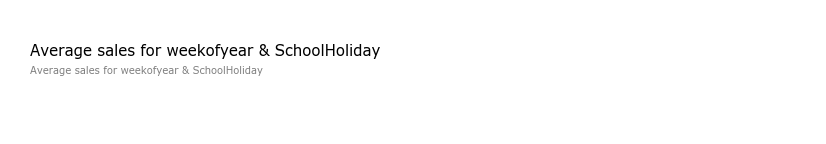

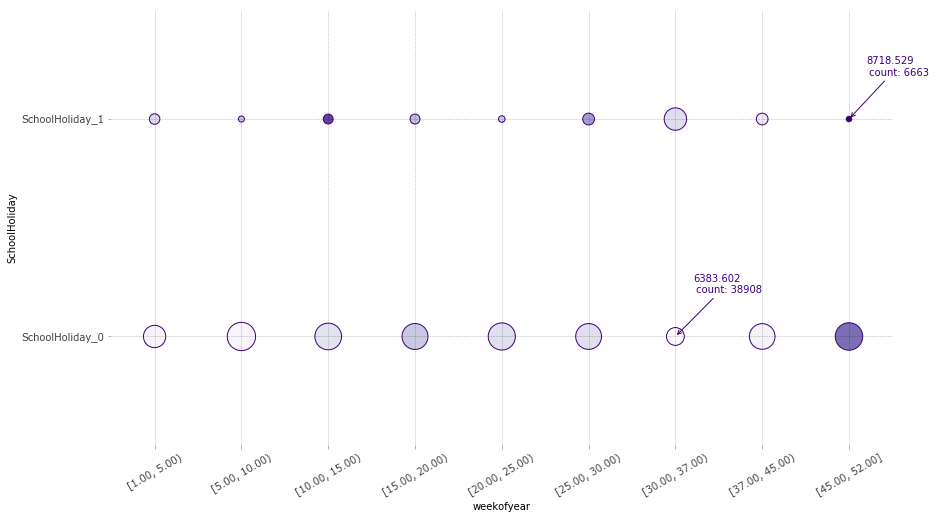

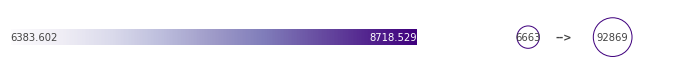

In [36]:
# use plot_params
plot_params = {
    'font_family': 'Verdana',
    'title': 'Average sales for weekofyear & SchoolHoliday',
    'subtitle': 'Average sales for weekofyear & SchoolHoliday',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'cmap': 'Purples',
    'cmaps': ['Blues', 'Greens', 'Oranges', 'Reds', 'Purples', 'Greys'],
    'line_width': 1,
    'xticks_rotation': 30,
    'marker_size_min': 30,
    'marker_size_max': 800
}
axes, df = target_plot_interact(df=ross_data, features=['weekofyear', 'SchoolHoliday'], 
                                feature_names=['weekofyear', 'SchoolHoliday'], 
                                target=ross_target, figsize=(14, 8), plot_params=plot_params)